In [2]:
import numpy as np
import astropy.units as u
import astropy.coordinates as SkyCoord
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
#%matplotlib inline
%matplotlib notebook
#matplotlib osx

In [3]:
m15 = pd.read_csv(r'm15new.csv')
m15

source_id          ra   ra_error        dec  dec_error  \
0     1745947984426398848  322.456441  11.568113  12.155031   5.627085   
1     1745947743909731200  322.489104  43.570026  12.155059  20.674042   
2     1745946365223099520  322.420809   0.283458  12.127405   0.327888   
3     1745934962086190976  322.604281   0.955150  12.096953   1.056411   
4     1745947915706834048  322.470453   1.380102  12.155705   0.674473   
...                   ...         ...        ...        ...        ...   
9995  1745952141957013760  322.410195   1.028603  12.223417   1.109282   
9996  1745948121867106176  322.503496   0.229560  12.159082   0.290003   
9997  1745948087506487808  322.522953   6.344323  12.161818  16.632974   
9998  1745950488391922560  322.359356   0.774932  12.189763   0.737248   
9999  1745936405199310464  322.572353   0.291583  12.153281   0.412268   

      parallax  parallax_error  phot_g_mean_mag     bp_rp  teff_val  
0          NaN             NaN        19.281490  0.780352       NaN  
1          NaN             NaN        17.115929  0.691276       NaN  
2     0.553210        0.362062        19.171534  0.555344       NaN  
3     1.633701        1.460977        20.389118  0.763409       NaN  
4          NaN             NaN        19.199873       NaN       NaN  
...        ...             ...              ...       ...       ...  
9995  1.289506        1.223266        20.613535  0.911303       NaN  
9996  5.163542        0.301794        17.198053  0.991527       NaN  
9997       NaN             NaN        19.885262       NaN       NaN  
9998 -1.008609        0.919144        20.347176  0.519911       NaN  
9999  0.314763        0.414692        19.184580  0.540337       NaN  

[10000 rows x 10 columns]

In [4]:
#m45data.teff_val.notnull()
m15.phot_g_mean_mag.notnull()
m15_mag = m15[m15.phot_g_mean_mag.notnull()]
m15_mag

source_id          ra   ra_error        dec  dec_error  \
0     1745947984426398848  322.456441  11.568113  12.155031   5.627085   
1     1745947743909731200  322.489104  43.570026  12.155059  20.674042   
2     1745946365223099520  322.420809   0.283458  12.127405   0.327888   
3     1745934962086190976  322.604281   0.955150  12.096953   1.056411   
4     1745947915706834048  322.470453   1.380102  12.155705   0.674473   
...                   ...         ...        ...        ...        ...   
9995  1745952141957013760  322.410195   1.028603  12.223417   1.109282   
9996  1745948121867106176  322.503496   0.229560  12.159082   0.290003   
9997  1745948087506487808  322.522953   6.344323  12.161818  16.632974   
9998  1745950488391922560  322.359356   0.774932  12.189763   0.737248   
9999  1745936405199310464  322.572353   0.291583  12.153281   0.412268   

      parallax  parallax_error  phot_g_mean_mag     bp_rp  teff_val  
0          NaN             NaN        19.281490  0.780352       NaN  
1          NaN             NaN        17.115929  0.691276       NaN  
2     0.553210        0.362062        19.171534  0.555344       NaN  
3     1.633701        1.460977        20.389118  0.763409       NaN  
4          NaN             NaN        19.199873       NaN       NaN  
...        ...             ...              ...       ...       ...  
9995  1.289506        1.223266        20.613535  0.911303       NaN  
9996  5.163542        0.301794        17.198053  0.991527       NaN  
9997       NaN             NaN        19.885262       NaN       NaN  
9998 -1.008609        0.919144        20.347176  0.519911       NaN  
9999  0.314763        0.414692        19.184580  0.540337       NaN  

[10000 rows x 10 columns]

In [5]:
m15_mag.bp_rp.notnull()
m15_filt = m15_mag[m15_mag.bp_rp.notnull()]
m15_filt

source_id          ra   ra_error        dec  dec_error  \
0     1745947984426398848  322.456441  11.568113  12.155031   5.627085   
1     1745947743909731200  322.489104  43.570026  12.155059  20.674042   
2     1745946365223099520  322.420809   0.283458  12.127405   0.327888   
3     1745934962086190976  322.604281   0.955150  12.096953   1.056411   
5     1745946880620719104  322.335294   0.955781  12.117710   1.034808   
...                   ...         ...        ...        ...        ...   
9994  1745949290100080000  322.486814   1.066355  12.208163   0.894587   
9995  1745952141957013760  322.410195   1.028603  12.223417   1.109282   
9996  1745948121867106176  322.503496   0.229560  12.159082   0.290003   
9998  1745950488391922560  322.359356   0.774932  12.189763   0.737248   
9999  1745936405199310464  322.572353   0.291583  12.153281   0.412268   

      parallax  parallax_error  phot_g_mean_mag     bp_rp  teff_val  
0          NaN             NaN        19.281490  0.780352       NaN  
1          NaN             NaN        17.115929  0.691276       NaN  
2     0.553210        0.362062        19.171534  0.555344       NaN  
3     1.633701        1.460977        20.389118  0.763409       NaN  
5     4.648874        1.203056        20.638330  2.385370       NaN  
...        ...             ...              ...       ...       ...  
9994       NaN             NaN        19.626637  0.800243       NaN  
9995  1.289506        1.223266        20.613535  0.911303       NaN  
9996  5.163542        0.301794        17.198053  0.991527       NaN  
9998 -1.008609        0.919144        20.347176  0.519911       NaN  
9999  0.314763        0.414692        19.184580  0.540337       NaN  

[6982 rows x 10 columns]

In [6]:
m15_g = m15_filt['phot_g_mean_mag'].to_numpy()
m15_bprp = m15_filt['bp_rp'].to_numpy()

<IPython.core.display.Javascript object>


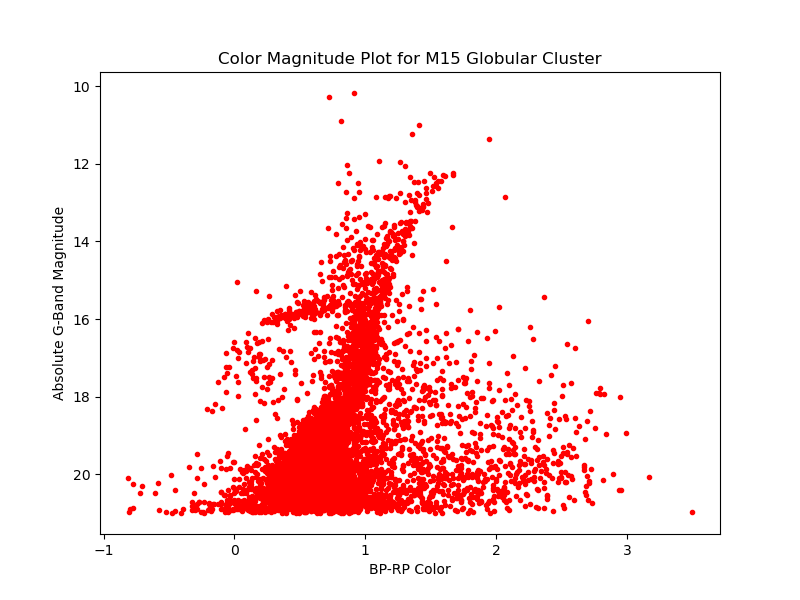

In [7]:
plt.figure(figsize=(8,6))
plt.gca().invert_yaxis()
plt.title('Color Magnitude Plot for M15 Globular Cluster')
plt.xlabel('BP-RP Color')
plt.ylabel('Absolute G-Band Magnitude')
plt.plot(m15_bprp, m15_g, 'r.')
plt.show()

In [8]:
m15_filt.teff_val.notnull()

0       False
1       False
2       False
3       False
5       False
        ...  
9994    False
9995    False
9996    False
9998    False
9999    False
Name: teff_val, Length: 6982, dtype: bool

In [9]:
m15_new = m15_filt[m15_filt.teff_val.notnull()]
m15_new

source_id          ra  ra_error        dec  dec_error  \
8     1745947705258773120  322.473661  0.061510  12.137351   0.064594   
19    1745947911417203200  322.473639  0.102529  12.150463   0.107902   
38    1745947636539339648  322.498733  0.080777  12.132850   0.104947   
39    1745948328025668992  322.490737  0.888479  12.172678   1.821836   
70    1745948358093844992  322.498532  0.265880  12.181006   0.134636   
...                   ...         ...       ...        ...        ...   
9949  1745947640833297920  322.495114  0.045238  12.126803   0.053325   
9964  1745947056717852672  322.387775  0.071025  12.125873   0.083622   
9975  1745955165616226048  322.775873  0.025039  12.135093   0.026076   
9988  1745957536438172800  322.807278  0.027525  12.165517   0.031003   
9990  1745948259309050624  322.529804  0.041188  12.174318   0.050143   

      parallax  parallax_error  phot_g_mean_mag     bp_rp   teff_val  
8     0.053599        0.076175        16.037628  0.235791  9196.0000  
19   -0.237818        0.119592        17.032768  0.870728  5095.6333  
38    0.238241        0.117326        15.845233  0.646138  6858.4670  
39         NaN             NaN        15.545918  0.528753  5095.6333  
70         NaN             NaN        16.420218  0.884294  5095.6333  
...        ...             ...              ...       ...        ...  
9949  0.067780        0.059099        15.743364  0.578642  6873.3335  
9964 -0.061791        0.091966        16.887716  0.980570  5220.0000  
9975  0.710052        0.030581        14.316500  0.795577  5940.0000  
9988  3.824479        0.032775        14.498750  1.613438  4227.6665  
9990 -0.002808        0.054743        15.546624  1.104810  4949.7075  

[939 rows x 10 columns]

In [10]:
m15_final_g = m15_new['phot_g_mean_mag'].to_numpy()
m15_final_bprp = m15_new['bp_rp'].to_numpy()
m15_final_teff = m15_new['teff_val'].to_numpy()

<IPython.core.display.Javascript object>


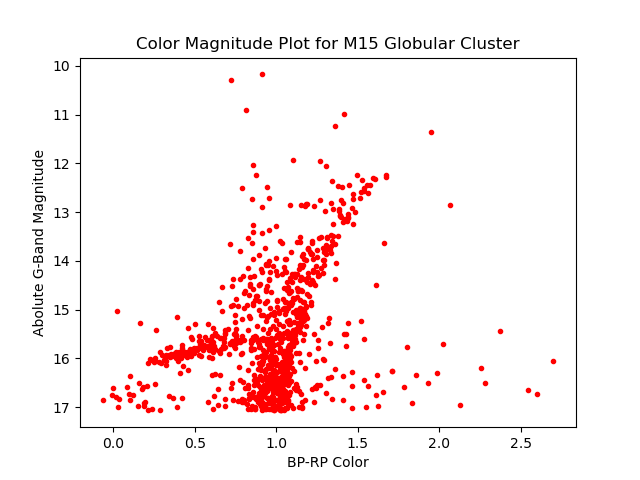

In [11]:
plt.figure()
plt.gca().invert_yaxis()
#plt.yscale('log')
#plt.xscale('log')
plt.title('Color Magnitude Plot for M15 Globular Cluster')
plt.xlabel('BP-RP Color')
plt.ylabel('Abolute G-Band Magnitude')
plt.plot(m15_final_bprp, m15_final_g, 'r.')
plt.show()

<IPython.core.display.Javascript object>


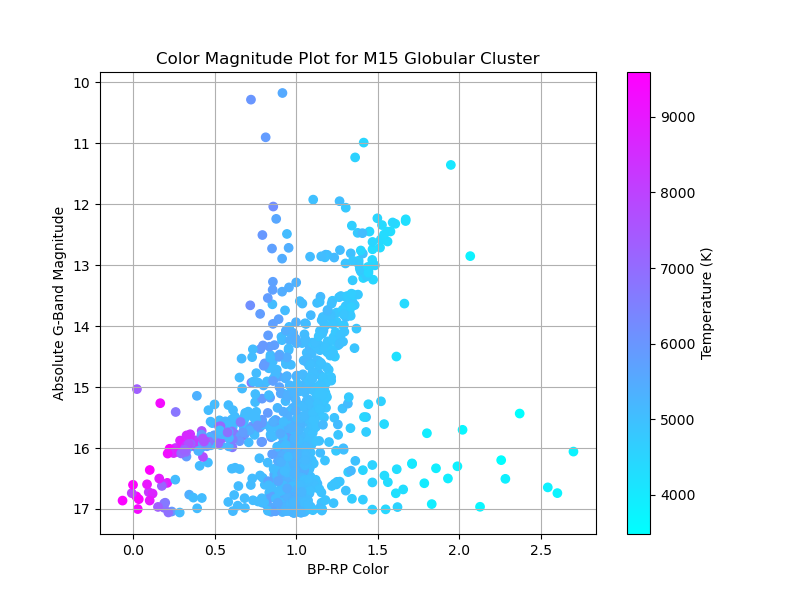

In [12]:
plt.figure(figsize=(8,6))
plt.gca().invert_yaxis()
plt.scatter(m15_final_bprp, m15_final_g, c=m15_final_teff, alpha=1.0) #alpha is the transparency 
plt.cool()       
plt.colorbar(label='Temperature (K)') 
plt.grid()
plt.title('Color Magnitude Plot for M15 Globular Cluster')
plt.xlabel('BP-RP Color')
plt.ylabel('Absolute G-Band Magnitude')
plt.savefig('graph1.png')
plt.show()

<IPython.core.display.Javascript object>


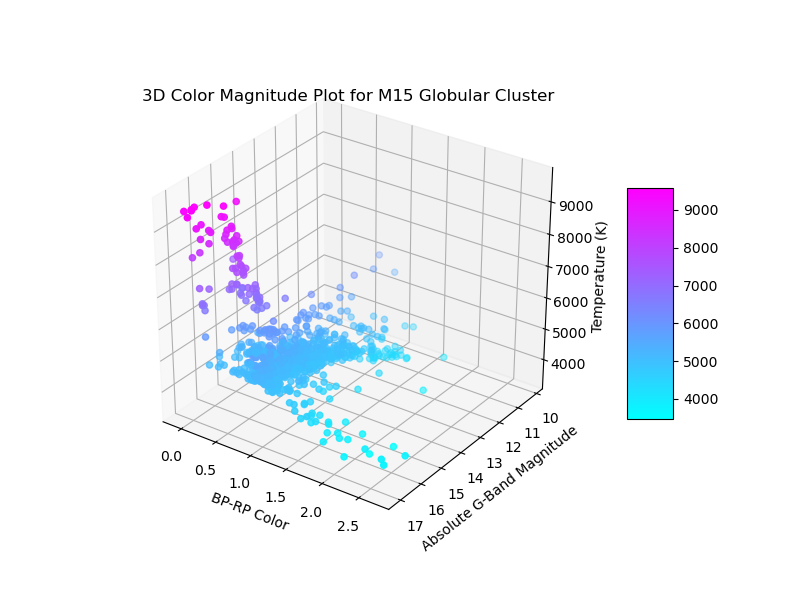

In [14]:
x = m15_final_bprp
y = m15_final_g
z = m15_final_teff

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")
surf = ax.scatter3D(x, y, z, c=z)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.invert_yaxis()
ax.set_title("3D Color Magnitude Plot for M15 Globular Cluster")
ax.set_xlabel('BP-RP Color')
ax.set_ylabel('Absolute G-Band Magnitude')
ax.set_zlabel('Temperature (K)')

plt.show()


<IPython.core.display.Javascript object>


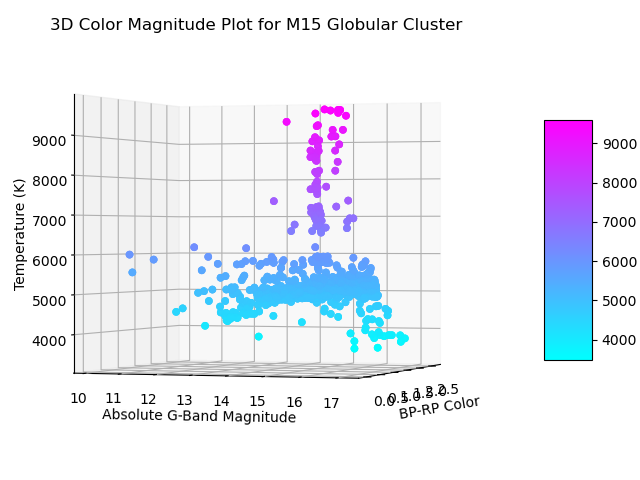

In [22]:
fig = plt.figure()
ax = Axes3D(fig)

ax.invert_yaxis()
ax.set_title("3D Color Magnitude Plot for M15 Globular Cluster")
ax.set_xlabel('BP-RP Color')
ax.set_ylabel('Absolute G-Band Magnitude')
ax.set_zlabel('Temperature (K)')
fig.colorbar(surf, shrink=0.5, aspect=5)

def init():
    ax.scatter(x, y, z, marker='o', c=z, alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=0., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('m15newanimation0.mp4', fps=30, bitrate=1500) 